In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict

In [4]:
from data import LaneData
data = LaneData('https://minigolf-live.com/turnier1304a/result.htm')

INIT DONE


In [38]:
#define the lanes for the CUP system
lanes_f = [ 'F'+str(i) for i in [1,2,3,8,9,10,13,16,18]]
lanes_e = [ 'E'+str(i) for i in [2,3,6,10,14,15,16,17,18 ]]

LANES_A_ALL = [ 'F'+str(i+1) for i in range(18)]
LANES_B_ALL = [ 'E'+str(i+1) for i in range(18)]  


LANES_A = lanes_f
LANES_B = lanes_e

In [39]:
from bracket import RANK_W,RANK_M

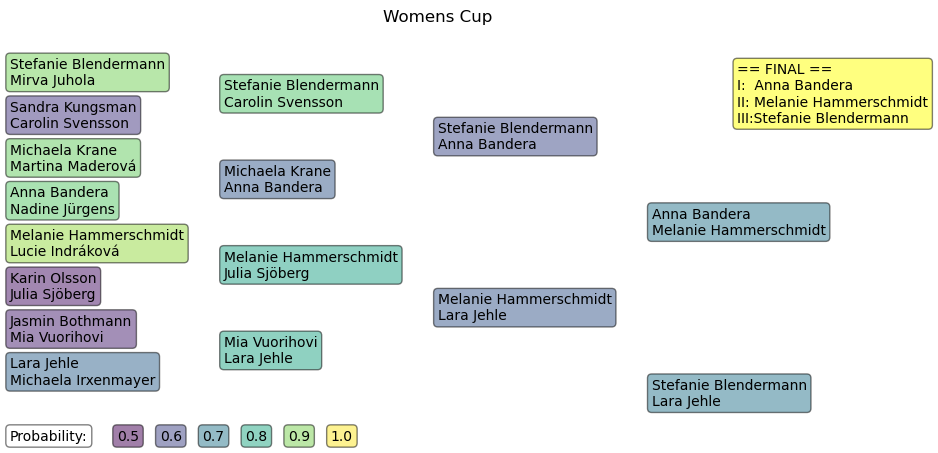

In [40]:
from matchplay_MC import Cup_16, Cup_32
cup_W = Cup_16(RANK_W, data, LANES_A,LANES_B,mc_iter = 1000)
cup_W.plot()
plt.savefig('../FIG/matchplay_W_lanes',bbox_inches = 'tight')

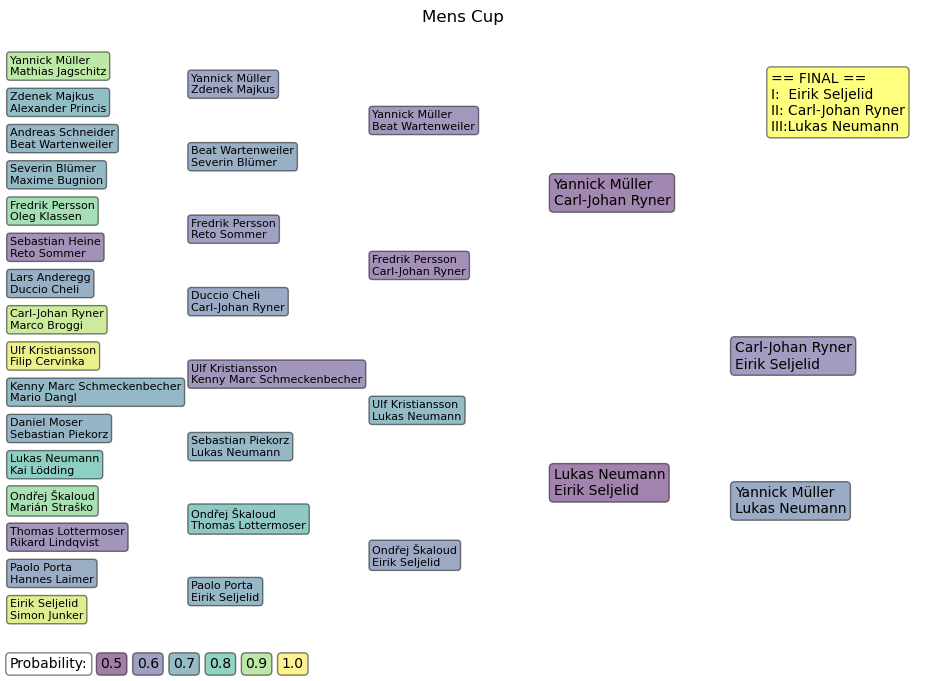

In [42]:
cup_M = Cup_32(RANK_M, data, LANES_A,LANES_B,mc_iter = 1000)
cup_M.plot()
plt.savefig('../FIG/matchplay_M_lanes',bbox_inches = 'tight')